In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = pd.read_csv('DR14_10Binaries.csv',delimiter='\t',usecols=[9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
                                                              24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
                                                             40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,
                                                             57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,
                                                             75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,
                                                             93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,
                                                             109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,
                                                              124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,
                                                             140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,
                                                             157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,
                                                             175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,
                                                             193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,
                                                              210,211,212,213,214,215,216,217,218,219,220,221,222,223,
                                                              224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,
                                                             240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,
                                                             257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,
                                                             275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,
                                                             293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,
                                                             309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,
                                                              324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,
                                                             340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,
                                                             357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,
                                                             375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,
                                                             393,394,395,396,397,398,399,400], nrows=2,header=None)#,nrows=1)

In [3]:
ccf_whole = np.array(x)

In [4]:
ccf = ccf_whole[1]

In [5]:
CCF = []
for i in range(len(ccf)):
    element = ccf[i].strip('')
    CCF.append(element)

In [25]:
CCF = np.array(CCF)

In [27]:
print(type(CCF))
print(CCF.size)

<class 'numpy.ndarray'>
392


In [8]:
xccf = np.arange(0,392,1)
xccf2 = np.arange(0,401,0.5)

In [28]:
xccf = np.array(xccf)

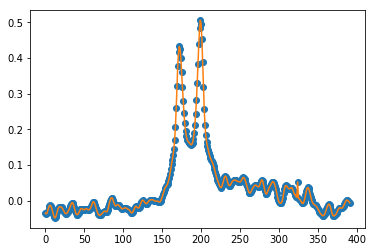

In [9]:
plt.plot(xccf,CCF,'o')
plt.plot(xccf,CCF)
plt.show()

In [21]:
#print(max(CCF), min(CCF))

In [52]:
ccfs = CCF.astype(np.float)[0]
XCCF = xccf.astype(np.float)[0]
print(len(ccfs))

392


In [65]:
sortCCF = []

for i in range(len(ccfs)):
    if i < 391:
        point = (ccfs[i+1] - ccfs[i])/(XCCF[i+1]-XCCF[i])
        #print(point)
        sortCCF.append(point)
    else:
        break
print(type(sortCCF))

<class 'list'>


In [66]:
sortCCF = np.array(sortCCF)
finerCCF = sortCCF.astype(np.float)

In [68]:
finerccfs = np.concatenate((ccfs,finerCCF),axis=0)
print(len(finerccfs))

783


In [76]:
xs = np.arange(0,392,0.5)
xs = xs[0:783]

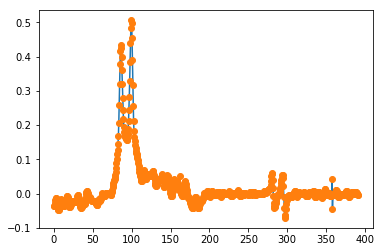

In [78]:
plt.plot(xs,finerccfs)
plt.plot(xs,finerccfs,'o')
plt.show()

In [86]:
def inflect_pts(CCF):
    peak = np.argmax(CCF)
    pos1, pos2 = -1,-1
    pos3 = -1
    for i in range(peak,len(CCF)-1):
        if (CCF[i+1] - CCF[i] > 0):
            pos1 = i
            break
    for i in range(peak, 1,-1):
        if (CCF[i-1] - CCF[i] > 0):
            pos2 = i
            break
    for i in range(peak,len(CCF)-1):
        if (CCF[i-1] > CCF[i]) and (CCF[i+1] > CCF[i]):
            pos3 = i 
            break
    return pos1, pos2, pos3

### Another way to Interpolate

In [81]:
from scipy import interpolate

def finerpts(x,y):
    x_pts = np.array(x)
    y_pts = np.array(y)
    
    mark = interpolate.splrep(x_pts,y_pts)
    finerccf = interpolate.splev(x,mark)
    
    return finerccf
    

In [82]:
finerccfs = finerpts(XCCF,ccfs)

In [86]:
print(len(finerccfs))

392


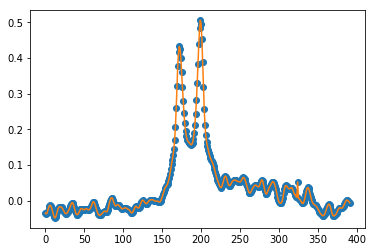

In [88]:
plt.plot(XCCF,finerccfs,'o')
plt.plot(XCCF,finerccfs)
plt.show()

In [96]:
def width(x,y):  
    ccfmax = max(y)
    ccf_half = ccfmax/2.0
    print(ccf_half)

    peak_loc = np.where(y == ccfmax)
    half_loc = np.where(y == ccf_half)
    print(peak_loc, half_loc)

In [97]:
fwhm = width(XCCF,ccfs)

0.253044
(array([199]),) (array([], dtype=int64),)
